Ch03_Q14

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

(a) Perform the following commands

In [30]:
rng = np.random.default_rng (10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

df = pd.DataFrame({'value': ['2', '2', '0.3']}, index=['Intercept', 'x₁', 'x₂'])
print(df)

          value
Intercept     2
x₁            2
x₂          0.3


(b) What is the correlation between x₁ and x₂? <br>
Create a scatterplot 
displaying the relationship between the variables.

Correlation between x1 and x2: 0.772324497691354


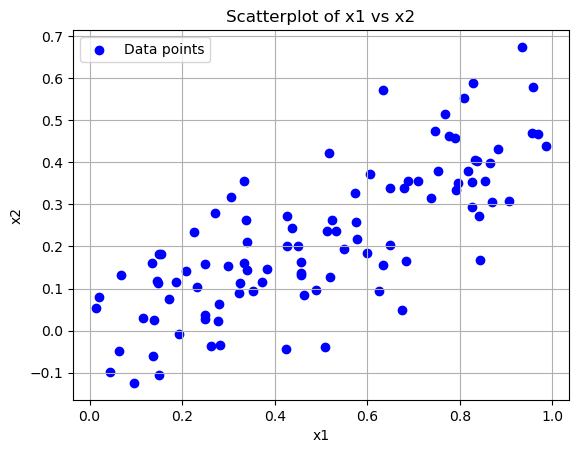

In [27]:
correlation = np.corrcoef(x1, x2)[0, 1]
print(f"Correlation between x1 and x2: {correlation}")

plt.scatter(x1, x2, color='b', label='Data points')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatterplot of x1 vs x2')

plt.legend()
plt.grid(True)
plt.show()

(c) Using this data, fit a least squares regression to predict y using x₁ and x₂.<br>
Describe the results obtained. What are β^₀, β^₁, and β^₂? <br>
How do these relate to the true β₀, β₁, and β₂? <br>
Can youreject the null hypothesis H₀ : β₁ = 0?<br>
How about the null hypothesis H₀ : β₂ = 0?

In [37]:
X = np.column_stack((x1, x2))

X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()
print(model.summary())

df['Estimate'] = np.round(model.params,4)
print('\n',df)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           5.76e-08
Time:                        12:37:09   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

The p-value for β₁ is 0.003 < α=0.05<br>
We can reject the null hypothesis H₀ : β₁ = 0 <br>
The p-value for β₂ is 0.259 > α=0.05 <br>
We cannot reject the null hypothesis H₀ : β₂ = 0

(d) Now fit a least squares regression to predict y using only x₁.<br>
Comment on your results. Can you reject the null hypothesis H₀ : β₁ = 0?

In [44]:
X1 = sm.add_constant(x1)
model_x1 = sm.OLS(y, X1).fit()


print(model_x1.summary())

df1 = pd.DataFrame(np.round(model_x1.params,4), columns=['values'], index=['β^₀', 'β^₁'])
print('\n',df1)
print('\np-value for β₁:', model_x1.pvalues[1])


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           1.37e-08
Time:                        12:50:16   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.0

We can reject the null hypothesis H₀ : β₁ = 0

(e) Now fit a least squares regression to predict y using only x₂.<br>
Comment on your results. Can you reject the null hypothesis H₀ : β₁ = 0?

In [45]:
X2 = sm.add_constant(x2)
model_x2 = sm.OLS(y, X2).fit()


print(model_x2.summary())

df2 = pd.DataFrame(np.round(model_x2.params,4), columns=['values'], index=['β^₀', 'β^₂'])
print('\n',df2)
print('\np-value for β₂:', model_x2.pvalues[1])


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           7.43e-07
Time:                        12:54:57   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.0

We can reject the null hypothesis H₀ : β₁ = 0

(f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

The results do not contradict each other. <br>
They reveal the presence of multicollinearity between x1 and x2 when both are used together in (c). <br>
However, when evaluated separately, both x1 and x2 are significant.<br>
This is common in regression analysis when predictors are highly correlated.

(g) Suppose we obtain one additional observation, which was unfortunately mismeasured.<br>
We use the function np.concatenate( ) to add this additional observation to each of x₁, x₂ and y.<br>
Re-fit the linear models from (c) to (e) using this new data. <br>
What effect does this new observation have on the each of the models?<br>
In each model, is this observation an outlier? <br>
A high-leverage point? Both? Explain your answers.

Leverage of the new observation: 0.3477
Student residual of the new observation: 2.7837


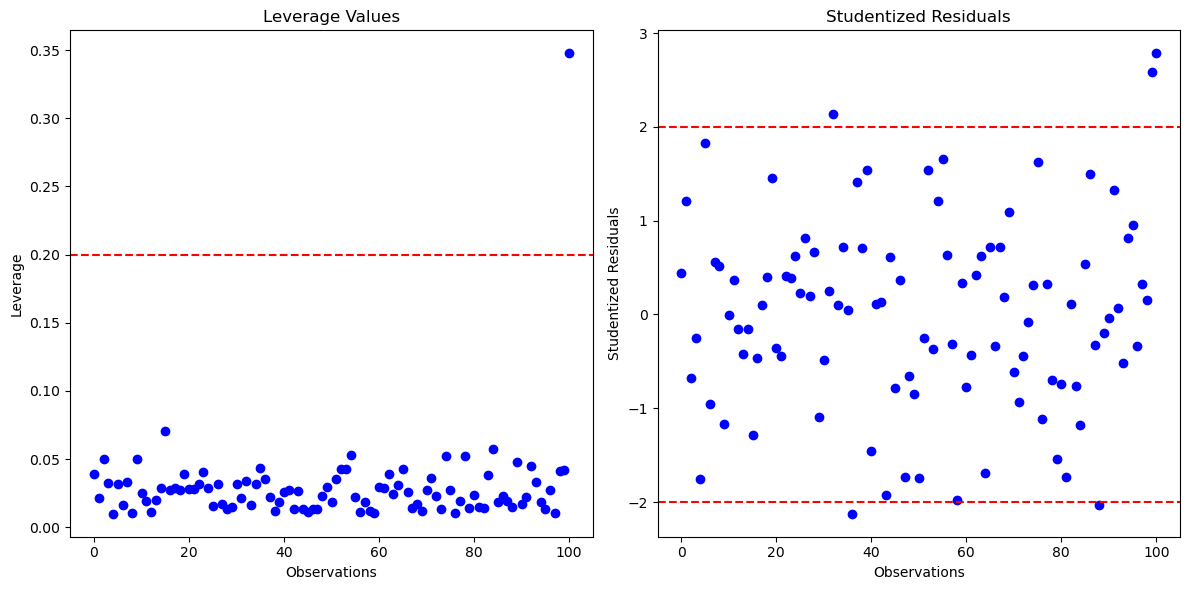

    x1 and x2      x1      x2
β₀     2.0618  2.0739  2.2840
β₁     0.8575  1.8760  3.1458
β₂     2.2663     NaN     NaN


In [64]:
x1_new = np.concatenate([x1, [0.1]])
x2_new = np.concatenate([x2, [0.8]])
y_new = np.concatenate([y, [6]])

# (c)
X_new = sm.add_constant(np.column_stack((x1_new, x2_new)))
model_new = sm.OLS(y_new, X_new).fit()

# (d)
X1_new = sm.add_constant(x1_new)
model_x1_new = sm.OLS(y_new, X1_new).fit()

# (e)
X2_new = sm.add_constant(x2_new)
model_x2_new = sm.OLS(y_new, X2_new).fit()

# Perform leverage and outlier analysis using statsmodels
influence = model_new.get_influence()
leverage = influence.hat_matrix_diag
studentized_residuals = influence.resid_studentized_external

# Check the leverage and residual for the new point
last_point_leverage = leverage[-1]
last_point_student_residual = studentized_residuals[-1]
print('Leverage of the new observation:',np.round(last_point_leverage,4))
print('Student residual of the new observation:',np.round(last_point_student_residual,4))


# Plot the leverage and studentized residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(range(len(leverage)), leverage, color='b')
plt.axhline(y=0.2, color='r', linestyle='--')
plt.title('Leverage Values')
plt.xlabel('Observations')
plt.ylabel('Leverage')

plt.subplot(1, 2, 2)
plt.scatter(range(len(studentized_residuals)), studentized_residuals, color='b')
plt.axhline(y=2, color='r', linestyle='--')
plt.axhline(y=-2, color='r', linestyle='--')
plt.title('Studentized Residuals')
plt.xlabel('Observations')
plt.ylabel('Studentized Residuals')

plt.tight_layout()
plt.show()

df3 = pd.DataFrame(index=['β₀', 'β₁', 'β₂'])
df3['x1 and x2'] = np.round(model_new.params, 4)
df3['x1'] = np.nan
df3.loc[['β₀', 'β₁'], 'x1'] = np.round(model_x1_new.params, 4)
df3['x2'] = np.nan
df3.loc[['β₀', 'β₁'], 'x2'] = np.round(model_x2_new.params, 4)

print(df3)

The leverage score for the new observation in the model from (c) is 0.3477, which is much higher than the average leverage score. <br>
This means it has a substantial influence on the fit of the regression line. <br>
The studentized residual for the new observation is 2.7837, which suggests it is an outlier. <br> 
Commonly, studentized residuals greater than 2 or less than -2 indicate outliers like the right plot. <br>